In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
df = pd.read_csv(r"../DataSets/eccommerce_sales_data/data.zip", encoding='latin', compression='zip')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df[df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [8]:
df[df['Description'].isnull()]['CustomerID'].isnull().count()

1454

In [9]:
df.drop('CustomerID', axis='columns', inplace=True)

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [11]:
df['Description'] = df['Description'].fillna('SOME PRODUCT')
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [12]:
products_with_count = df['Description'].value_counts()
products_with_count.head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

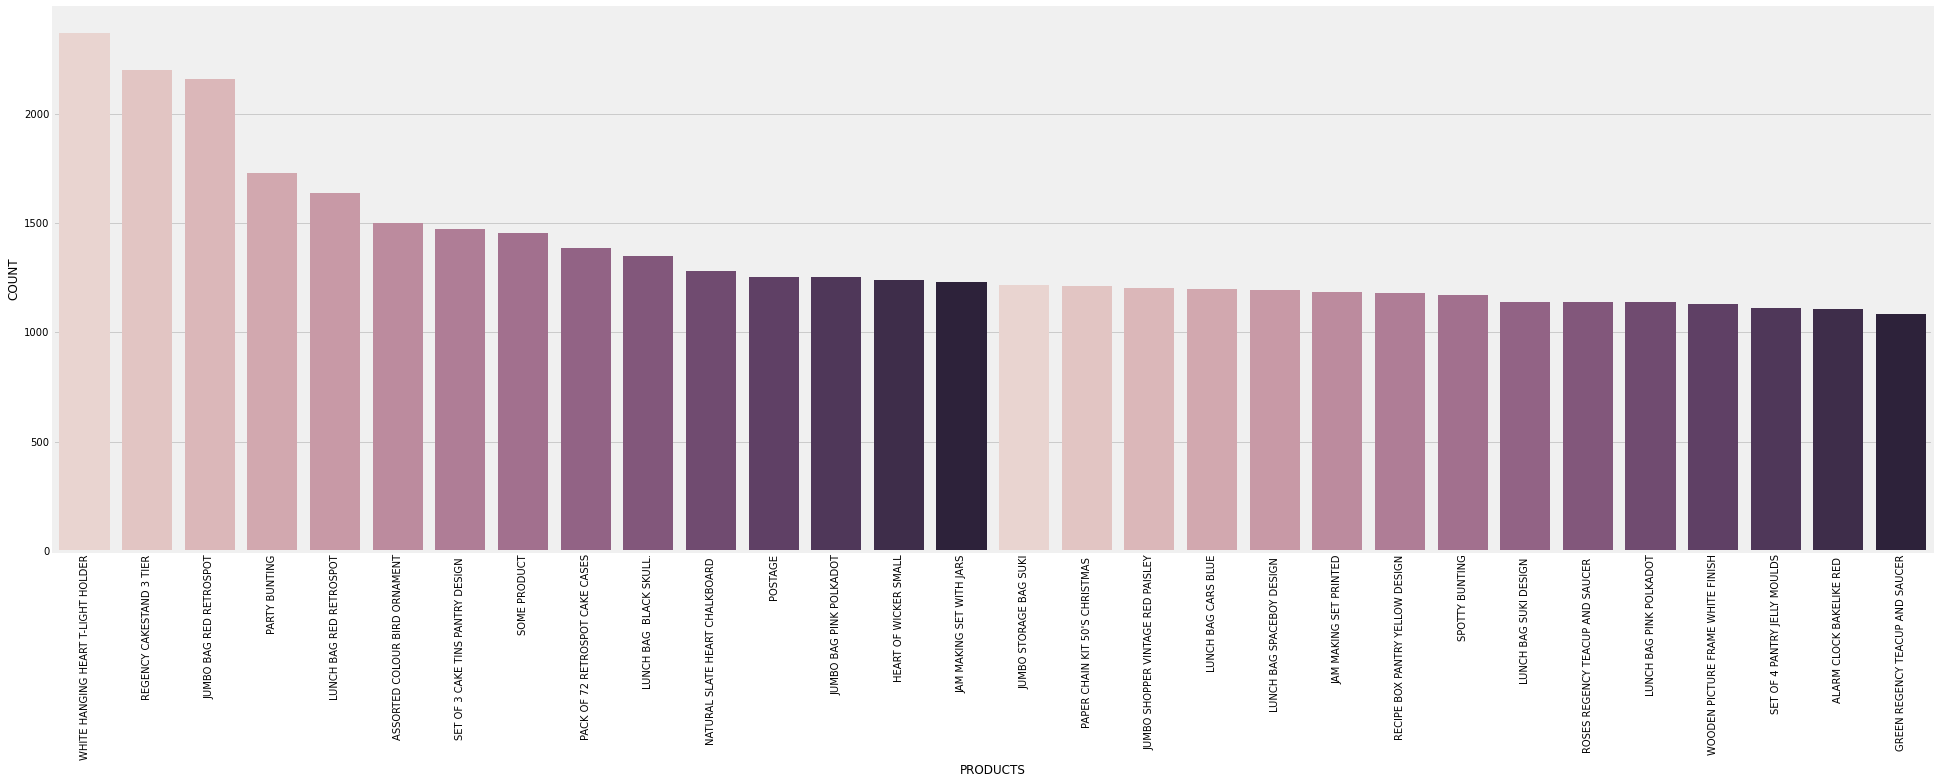

In [13]:
products_with_count = products_with_count.sort_values(ascending=False)

def plot_barchart(dataframe, xlabel, ylabel):
    plt.figure(figsize=(30,10))
    sns.barplot(dataframe.index, dataframe.values, palette=sns.cubehelix_palette(15))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation=90)
    plt.show()

plot_barchart(products_with_count.iloc[0:30], 'PRODUCTS', 'COUNT')

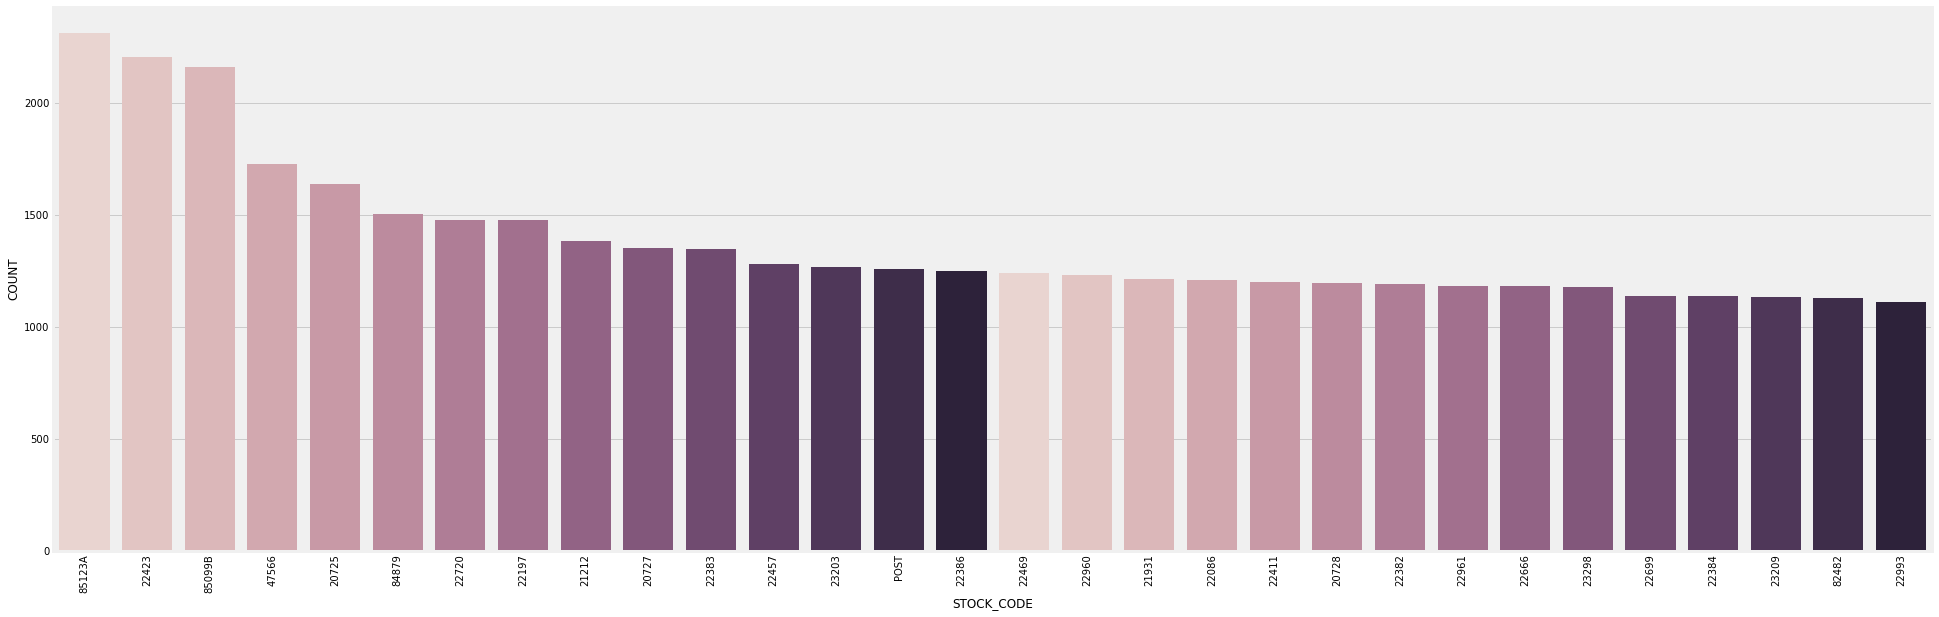

In [14]:
stockcodes_with_count = df['StockCode'].value_counts().sort_values(ascending=False)
plot_barchart(stockcodes_with_count.iloc[0:30], 'STOCK_CODE', 'COUNT')

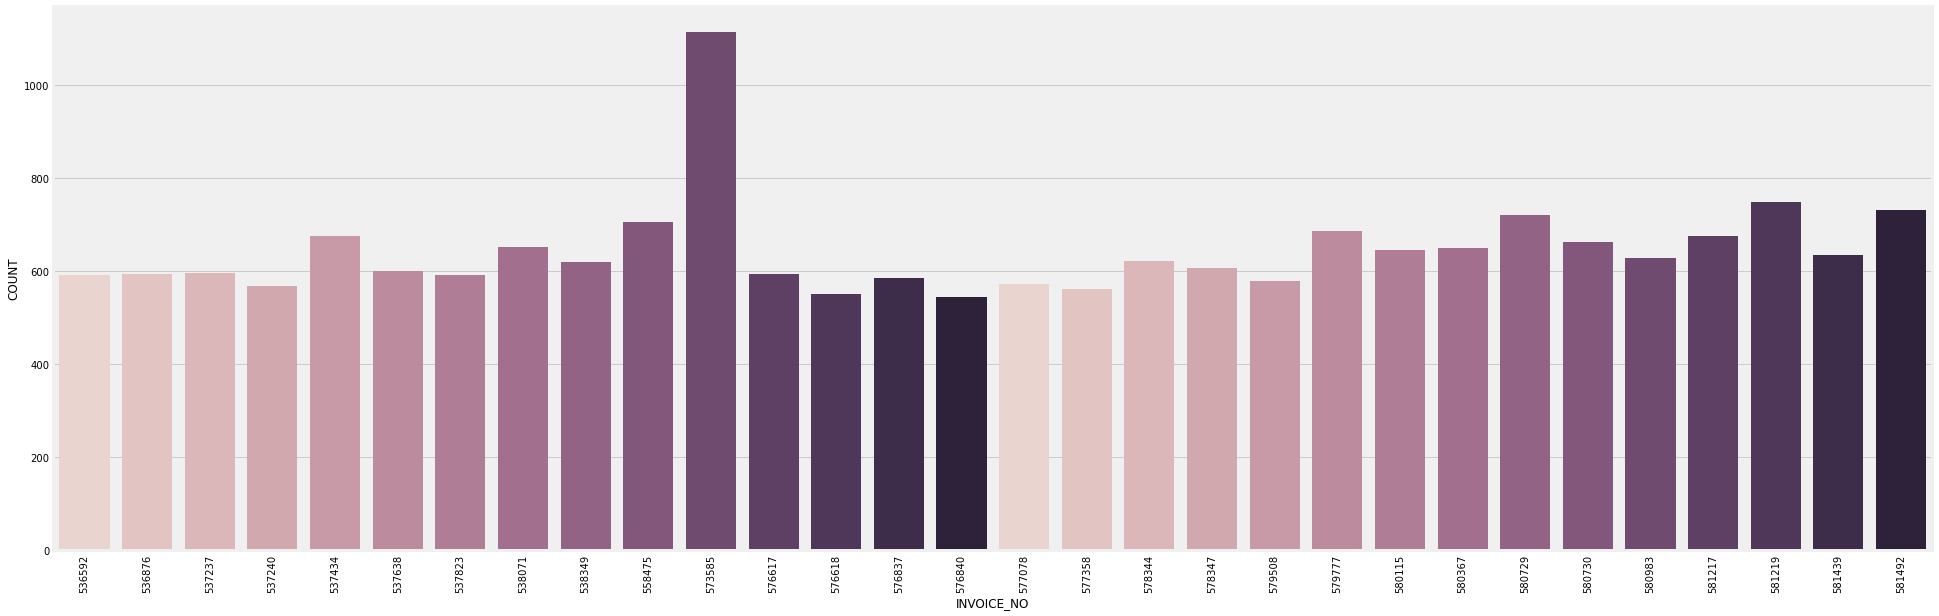

In [15]:
invoice_num_with_count = df['InvoiceNo'].value_counts().sort_values(ascending=False)
plot_barchart(invoice_num_with_count.iloc[0:30], 'INVOICE_NO', 'COUNT')

In [16]:
invoice_num_with_count.index.unique()

Index(['573585', '581219', '581492', '580729', '558475', '579777', '581217',
       '537434', '580730', '538071',
       ...
       'C539589', '543479', '549326', '540011', '576258', 'C553027', '569557',
       '573493', 'C577722', '537016'],
      dtype='object', length=25900)

In [17]:
df[df['InvoiceNo'].str.startswith('C')].describe()

,Quantity,UnitPrice
count,9288.000000,9288.000000
mean,-29.885228,48.393661
std,1145.786965,666.600430
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,5.950000
max,-1.000000,38970.000000


In [18]:
df = df[~df['InvoiceNo'].str.startswith('C')]
df.describe()

,Quantity,UnitPrice
count,532621.000000,532621.000000
mean,10.239972,3.847621
std,159.593551,41.758023
min,-9600.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [19]:
df[df['Quantity'] < 0].shape

(1336, 7)

In [20]:
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
2406,536589,21777,SOME PRODUCT,-10,2010-12-01 16:50:00,0.0,United Kingdom
4347,536764,84952C,SOME PRODUCT,-38,2010-12-02 14:42:00,0.0,United Kingdom
7188,536996,22712,SOME PRODUCT,-20,2010-12-03 15:30:00,0.0,United Kingdom
7189,536997,22028,SOME PRODUCT,-20,2010-12-03 15:30:00,0.0,United Kingdom
7190,536998,85067,SOME PRODUCT,-6,2010-12-03 15:30:00,0.0,United Kingdom


In [21]:
df[df['Quantity'] > 0].shape

(531285, 7)

In [22]:
df = df[df['Quantity'] > 0]

In [23]:
df[df['UnitPrice'] < 0].shape

(2, 7)

In [24]:
df = df[df['UnitPrice'] > 0]
df.shape

(530104, 7)

In [25]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


# **TODO:** OUTLIER DETECTION

In [26]:
#df = df.set_index('InvoiceDate')

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [28]:
df_join = df.groupby('InvoiceNo')[['Quantity']].sum()

In [29]:
df_join = df_join.reset_index()
df_join.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


In [30]:
df = df.merge(df_join, how='left', on='InvoiceNo')
df = df.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df.tail(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,QuantityInv
530089,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,France,23.40,105
530090,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,France,19.80,105
530091,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,France,19.80,105
530092,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,France,15.00,105
530093,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,France,15.00,105
530094,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,France,15.00,105
530095,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,France,15.00,105
530096,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,France,15.60,105
530097,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,France,23.40,105
530098,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,France,16.60,105


In [31]:
df.describe()

,Quantity,UnitPrice,Sales,QuantityInv
count,530104.000000,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,20.121871,538.838337
std,155.524124,35.915681,270.356743,903.278125
min,1.000000,0.001000,0.001000,1.000000
25%,1.000000,1.250000,3.750000,152.000000
50%,3.000000,2.080000,9.900000,303.000000
75%,10.000000,4.130000,17.700000,574.000000
max,80995.000000,13541.330000,168469.600000,80995.000000


In [32]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
Sales                 float64
QuantityInv             int64
dtype: object

In [33]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
df['QuantityRange'] = pd.cut(df['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
df['PriceRange'] = pd.cut(df['UnitPrice'], bins=bins_p)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,QuantityInv,QuantityRange,PriceRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,40,"(5, 8]","(2, 3]"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,40,"(5, 8]","(2, 3]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]"


In [34]:
df['Month'] = df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,QuantityInv,QuantityRange,PriceRange,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,40,"(5, 8]","(2, 3]",12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]",12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,40,"(5, 8]","(2, 3]",12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]",12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]",12


In [35]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df['DateRange'] = pd.cut(df['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,QuantityInv,QuantityRange,PriceRange,Month,DateRange
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,105,"(11, 14]","(0, 1]",12,"(9, 12]"
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,105,"(5, 8]","(2, 3]",12,"(9, 12]"
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,105,"(2, 5]","(4, 20]",12,"(9, 12]"
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,105,"(2, 5]","(4, 20]",12,"(9, 12]"
530103,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,France,14.85,105,"(2, 5]","(4, 20]",12,"(9, 12]"


In [36]:
df.dtypes

InvoiceNo                object
StockCode                object
Description              object
Quantity                  int64
InvoiceDate      datetime64[ns]
UnitPrice               float64
Country                  object
Sales                   float64
QuantityInv               int64
QuantityRange          category
PriceRange             category
Month                     int64
DateRange              category
dtype: object

In [37]:
df_uk_model = df[['Sales', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]
df_uk_model.head()

,Sales,QuantityInv,QuantityRange,PriceRange,DateRange
0,15.30,40,"(5, 8]","(2, 3]","(9, 12]"
1,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
2,22.00,40,"(5, 8]","(2, 3]","(9, 12]"
3,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
4,20.34,40,"(5, 8]","(3, 4]","(9, 12]"


In [38]:
df_data = df_uk_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,Sales,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [39]:
from sklearn.preprocessing import scale
df_data['QuantityInv'] = scale(df_data['QuantityInv'])

In [40]:
df_data.head()

,Sales,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,-0.552254,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,-0.552254,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,-0.552254,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,-0.552254,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,-0.552254,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [41]:
y = df_data['Sales']
X = df_data.drop(columns=['Sales'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [42]:
X_train.head()

,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
110116,-0.533433,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
210509,-0.575503,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
395511,-0.267734,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
506779,1.604338,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
368617,-0.016427,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [43]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# Random Forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

cv = 5

param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
    regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    params_dict = regressor.best_params_
    print("Best Parameters: {}".format(params_dict)) 
    score_dict[model] = regressor.best_score_
    print("Best score is {}".format(score_dict[model]))

    # Compute metrics
    mae_dict[model] = mean_absolute_error(y_test, y_pred)
    print("MAE for {} is {}".format(model, mae_dict[model]))
    mse_dict[model] = mean_squared_error(y_test, y_pred)
    print("MSE for {} is {}".format(model, mse_dict[model]))
    r2_dict[model] = r2_score(y_test, y_pred)
    print("R2 score for {} is {}".format(model, r2_dict[model]))
    print(15 * "=" + ">")

Best Parameters: {'fit_intercept': False}
Best score is -0.34092710391045866
MAE for LinearRegression is 33.053950870187315
MSE for LinearRegression is 20928.599343438393
R2 score for LinearRegression is -0.07938668131845739
===============>
Best Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.4043643794326658
MAE for DecisionTreeRegressor is 8.904217278978335
MSE for DecisionTreeRegressor is 17295.573754285455
R2 score for DecisionTreeRegressor is 0.1079856014353947
===============>
Best Parameters: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is 0.0451777558493611
MAE for RandomForest is 8.748123382506042
MSE for RandomForest is 16922.918847130804
R2 score for RandomForest is 0.1272051744660576
===============>


In [44]:
r2_dict

{'LinearRegression': -0.07938668131845739,
 'DecisionTreeRegressor': 0.1079856014353947,
 'RandomForest': 0.1272051744660576}

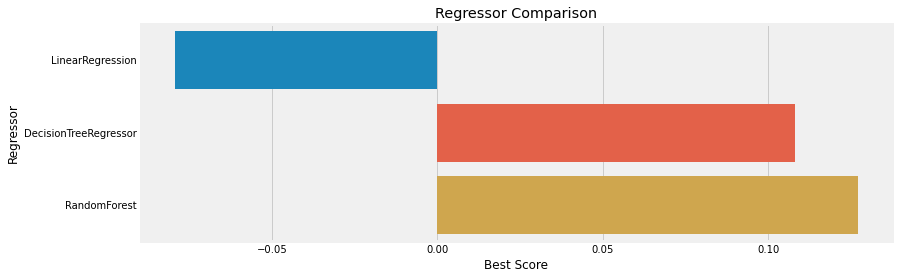

In [45]:
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

# Visualizing results
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Regressor Comparison')

sns.barplot(x='Best Score', y='Regressor', data=summary)